
# Support Vector Machines (SVM)


<ls>
    
    1. INTRODUCTION
    2. THEORY
    3. IMPLEMENTATION
    4. ADVANTAGES AND DISADVANTAGES OF THIS MODEL
    5. EXAMPLE
    6. TIPS AND TRICKS
    7. CONCLUSION
</ls>


## Brief Overview
Support Vector Machines (SVM) are a set of supervised learning methods used for classification, regression, and outliers detection. The advantages of support vector machines are:
- Effective in high dimensional spaces.
- Still effective in cases where the number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.




## Importance/Usefulness
SVMs are particularly well-suited for classification of complex but small to medium-sized datasets. They work by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (this is done with the help of kernel functions). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.


## Common Applications
Here are some of the areas where SVMs are commonly used:
- **Image Recognition**: SVMs can classify images with higher search accuracy. Their ability to handle multiple continuous and categorical variables makes them suitable for image classification.
- **Bioinformatics**: Includes protein classification and cancer classification. SVMs are used because of their ability to handle the complexity and size of biological datasets.
- **Text Categorization**: SVMs are used for identifying the category of a text document, whether it be a book, article, or other forms of text.
- **Handwriting Recognition**: SVMs are used to recognize handwritten characters used in various applications like postal automation services.
- **Financial Forecasting**: Can be applied to stock market prediction, credit scoring, and risk management by analyzing historic data to identify patterns.

- **Medical Diagnosis**: SVM is utilized in medical diagnosis for disease prediction, identifying biomarkers, and analyzing medical images like MRI scans and X-rays

In summary SVMs are powerful supervised learning algorithms mainly used for classification and regression tasks, that find a hyperplane in a high-dimensional space to optimally seperate data points belonging to different classes or predicting continuous outcomes. It is also known as widest street approach.




# Theory

## Underlying Principles
Support Vector Machines (SVM) are founded on the concept of finding a hyperplane that best divides a dataset into two classes, as shown in the figure below. The hyperplane is a decision boundary that separates the space into two parts where each class lies on either side.



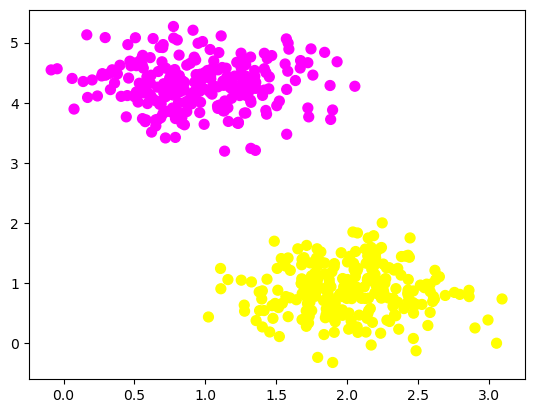

In [1]:
# https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/
# importing scikit learn with make_blobs
from sklearn.datasets import make_blobs
 
# creating datasets X containing n_samples
# Y containing two classes
X, Y = make_blobs(n_samples=500, centers=2,
                  random_state=0, cluster_std=0.40)
import matplotlib.pyplot as plt
# plotting scatters 
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring');
plt.show() 


## Mathematical Formulations
The objective of SVM is to find the optimal hyperplane that maximizes the margin between the two classes. The margin is defined as the distance between the hyperplane and the nearest data point from either set. If such a hyperplane exists, it is considered to be the best decision boundary. The optimization problem can be formulated as follows:

- **Objective Function**: 
  $$ \min_{\mathbf{w}, b} \frac{1}{2} ||\mathbf{w}||^2 $$
  
- **Constraints**: 
  For each \( i \) (data point),
  $$ y^{(i)}(\mathbf{w} \cdot \mathbf{x}^{(i)} + b) \geq 1 $$

Here,
- $ \mathbf{w} $ represents the weight vector,
- $ b $ is the bias term, 
- $ \mathbf{x}^{(i)} $ are the input features, 
- and $ y^{(i)} $ are the labels.



## Decision Boundary

The equation of the hyperplane is:

$$ wx - b = 0 $$

Here,
- $ \mathbf{w} $ represents the weight vector,
- $ b $ is the bias term, 
- $ \mathbf{x}^{(i)} $ are the input features, 

where

$$ wx = w_1 \cdot x_1 + w_2 \cdot x_2 + ... + w_m \cdot x_m $$

It has two tunable parameters:
- A real \(M\)-dimensional vector (the weights, or coefficients)
- A real number (the bias, or intercept)


The classification of an input is determined by its position relative to the hyperplane in feature space.

$$ \hat{y} = \text{sign}(wx - b) $$

The $\text{sign}(a)$ function returns:
- $+1$ if $a$ is positive
- $-1$ if $a$ is negative


The basic model for classifying inputs using SVM can be represented by the following function:

$$ f(x) = \text{sign}(w \cdot x - b) $$

This function denotes the starting point for creating a 
#### support vector machine (SVM).


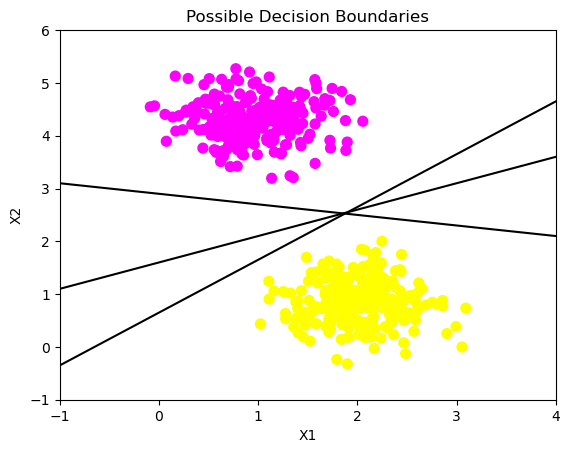

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Create dataset
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)

# Plotting scatters
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# Manually draw three possible decision boundaries
x = np.linspace(-1, 4)
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(x, m * x + b, '-k')

plt.xlim(-1, 4)
plt.ylim(-1, 6)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Possible Decision Boundaries')
plt.show()


## Maximum Margin Classification

In the context of machine learning, specifically Support Vector Machines (SVM), the parameters are tuned to ensure correct classification of the dataset examples. The constraints for the optimization problem are given by:

$$
\begin{align*}
w \cdot x_i - b &\geq 1 \quad \text{if } y_i = +1 \\
w \cdot x_i - b &\leq -1 \quad \text{if } y_i = -1
\end{align*}
$$

These can be compactly expressed as:

$$
y_i(w \cdot x_i - b) \geq 1
$$




Minimizing the Euclidean norm of the weight vector **w** is key to maximizing the margin between the two parallel hyperplanes in a Support Vector Machine (SVM). The mathematical expressions are:

- Euclidean norm of **w**:
  $$ \|\mathbf{w}\| = \sqrt{\overset{M}{\sum_{j}} (w^{(j)})^2} $$


- Equations of the parallel hyperplanes:
  $$ \mathbf{w} \cdot \mathbf{x} + b = 1 $$
  $$ \mathbf{w} \cdot \mathbf{x} - b = -1 $$

This concept is fundamental in understanding the operation of SVMs, particularly in how they achieve optimal separation of classes with the maximum margin.


These contrains on it's own are not enough as it does not narrow down to one single decision boundary. So we want our SVM to maximise the margin between two classes. The margin is the distance between the decision boundary and the closest support vectors of the two classes. Models with larger margins are better at generalizing meaning they would be best fit for our new/unseen data.

<img src ="https://scontent-lhr6-2.xx.fbcdn.net/v/t1.6435-9/171983901_1218353141952517_4823138826029449564_n.png?_nc_cat=105&ccb=1-7&_nc_sid=5f2048&_nc_ohc=FIkXVTYz3ucQ7kNvgFC33rE&_nc_ht=scontent-lhr6-2.xx&oh=00_AfBEbvpUYpc8O--6lz-fNYyGZsfybGIPB9Rngl-u5FYjBg&oe=665F36EF"/>


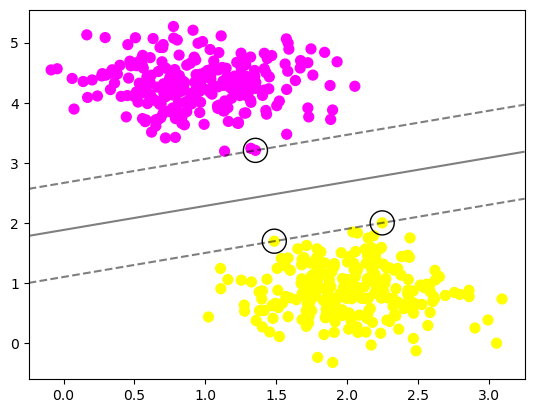

In [3]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# Create dataset
X, Y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.40)

# # Adding outliers
# outliers = np.random.uniform(low=-2, high=3, size=(50, 2))  # Generating 50 outliers
# X = np.vstack([X, outliers])
# Y = np.hstack([Y, np.ones(50)])  # Assigning them to one class

# Fit the SVM model
model = SVC(kernel='linear', C=1E10)
model.fit(X, Y)

# Function to plot decision boundary
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none', edgecolors='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

# Plotting scatters and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')
plot_svc_decision_function(model)
plt.show()




The SVM problem is formulated as a constrained optimization problem:

$$
\text{minimize } ||w|| \text{ subject to } y_i(w \cdot x_i - b) \geq 1 \text{ for } i = 1, 2, ..., N
$$

In practice, this is often expressed as a quadratic problem:

$$
\text{minimize } \frac{1}{2}||w||^2 \text{ subject to } y_i(w \cdot x_i - b) \geq 1 \text{ for } i = 1, 2, ..., N
$$

This outlines the core optimization problems in training an SVM classifier.


- **Hard-margin SVM**: 
  The goal is to find a hyperplane that separates the classes with the maximum margin while ensuring all examples are correctly classified. So the hard margin svm uses binary loss function meaning it will penalize the model for missclassification without taking into account how far away the vector was.
  $$ \text{minimize } \frac{1}{2} ||w||^2 \text{ subject to } y_i (w \cdot x_i + b) \geq 1 \text{ for } i=1,2,...,N $$

- **Soft-margin SVM**: 
  Allows some misclassifications to maximize the margin and control overfitting using a regularization parameter $C$. So since the soft margin svm uses hinge loss function it scales the penalty based on how far away the vector is and penalizes accordingly.
  $$ \text{minimize } \frac{1}{2} ||w||^2 + \overset{M}{\sum_{i}}  \xi_i \text{ subject to } y_i (w \cdot x_i + b) \geq 1 - \xi_i \text{ for } i=1,2,...,N $$





The hinge loss function used in soft-margin Support Vector Machines (SVMs) is defined as:

$$ L_{\text{hinge}}(w, b, x_i, y_i) = \max(0, 1 - y_i(w \cdot x_i - b)) $$

The $\max(a, b)$ operator returns:
- $a$ if $a$ is larger than $b$
- $b$ otherwise

This function is crucial for SVMs as it penalizes misclassifications, contributing to the model's ability to find the optimal separating hyperplane.




The cost function for a soft-margin SVM is given by:

$$ J(w, b) = \frac{1}{2} ||w||^2 + C \sum \max(0, 1 - y_i(w \cdot x_i + b)) $$

Where:
- $ ||w||^2 $ is the squared norm of the weight vector.
- $ C $ is the hyperparameter controlling the trade-off between margin maximization and misclassification error.
- The sum runs over all training examples \( i \).
- $ y_i $ and $ x_i $ are the target label and feature vector of the $ i^{th} $ training example.
- $ b $ is the bias term.




- **Large values of C**:
    - Term 2 contributes more to the cost.
    - Correct classification is prioritized over margin maximization.
    - A high-variance model is built.
    - The model tends to overfit.

- **Small values of C**:
    - Term 1 contributes more to the cost.
    - Margin maximization is prioritized over correct classification.
    - A high-bias model is built.
    - The model tends to underfit.


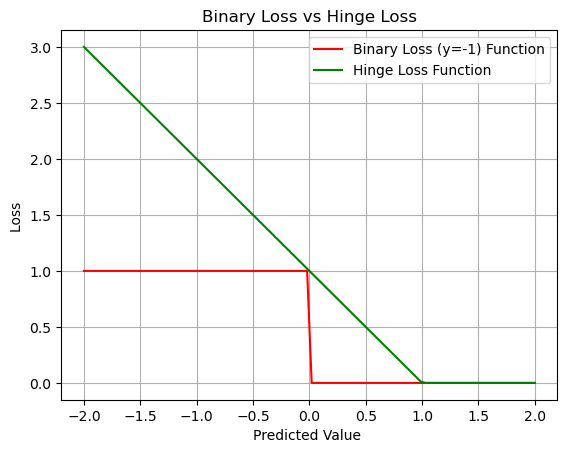

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
y_true = np.array([1, 1, -1, -1])  # True labels
y_pred = np.linspace(-2, 2, 100)  # Predicted scores

# Calculate binary losses
binary_losses = np.where(y_true[0] * y_pred > 0, 0, 1)  # Incorrect predictions cost 1

# Repeat binary loss values for each predicted value
binary_losses = np.tile(binary_losses, (len(y_true), 1))

# Plot binary loss for each y_true value
# plt.plot(y_pred, binary_losses[0], label='Binary Loss (y=1)', color='blue')
plt.plot(y_pred, binary_losses[1], label='Binary Loss (y=-1) Function', color='red')

# Calculate hinge loss
hinge_losses = np.maximum(0, 1 - y_true[0] * y_pred)

# Plot hinge loss
plt.plot(y_pred, hinge_losses, label='Hinge Loss Function', color='green')

plt.xlabel('Predicted Value ')
plt.ylabel('Loss ')
plt.title('Binary Loss vs Hinge Loss')
plt.legend()
plt.grid(True)
plt.show()


## Key Concepts
- **Support Vectors**: Data points that are closest to the hyperplane and influence its position.
- **Margin Maximization**: SVM aims to maximize the margin around the hyperplane. The larger the margin, the lower the generalization error of the classifier.
- **Kernel Trick**: A technique used to transform the input space into a higher-dimensional space to make it possible to perform linear separation when the data is not linearly separable in the original space. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.






The goal of SVM is to find the best possible boundary (or hyperplane) that separates data points into different classes. Imagine you have a set of red balls and blue balls on the ground, and you want to draw a line that separates them as clearly as possible. This line is what we call the hyperplane in SVM.
Now, let’s look at the formula piece by piece:


**Objective Function**:
  $$ \min_{\mathbf{w}, b} \frac{1}{2} ||\mathbf{w}||^2 $$
This part of the formula is about making the hyperplane as simple as possible while still correctly separating the data points. The term ( ||\mathbf{w}|| ) represents the “width” of the margin on either side of the hyperplane. We want to maximize this margin, but since it’s easier to minimize than maximize in optimization problems, we minimize its inverse, which is $ \frac{1}{2} ||\mathbf{w}||^2 $.






Constraints:
For each ( i ) (data point),
y(i)(w⋅x(i)+b)≥1
This part ensures that all the data points are on the correct side of the hyperplane. Here, $( \mathbf{x}^{(i)} )$ is a data point, $( y^{(i)} )$ is the class label of that data point (which can be -1 or 1), $( \mathbf{w} )$ is the weight vector that determines the orientation of the hyperplane, and ( b ) is the bias term that determines the position of the hyperplane. The product $( \mathbf{w} \cdot \mathbf{x}^{(i)} )$ is a dot product that measures how far away the data point is from the origin in the direction of $( \mathbf{w} )$. The inequality $( \geq 1 )$ means that every data point must be on the right side of the margin.






In essence, SVM tries to draw a line (in two dimensions) or a hyperplane (in higher dimensions) that has the widest possible gap between the two classes. It does this by finding the simplest possible dividing line while making sure that the data points are as far away from the line as possible, given their respective classes.
The kernel trick is a clever math technique that allows SVM to work in cases where the data isn’t linearly separable (i.e., you can’t draw a straight line to separate the classes). It does this by transforming the data into a higher-dimensional space where a hyperplane can be used to separate the classes. It’s like lifting the data off the page into a 3D space where you can find a plane that separates the data points.
The support vectors are the data points that are closest to the hyperplane and are the most difficult to classify. They are the critical elements of the data set because they are the ones that define the margin.
By maximizing the margin and ensuring the data points are on the correct side of the hyperplane, SVM achieves a good balance between a simple model (which is good for generalizing to new data) and a model that fits the training data well.

In [5]:
# # https://www.geeksforgeeks.org/classifying-data-using-support-vector-machinessvms-in-python/
# import numpy as np
# # creating linspace between -1 to 3.5 
# xfit = np.linspace(-1, 3.5)

# # plotting scatter
# plt.scatter(X[:, 0], X[:, 1], c=Y, s=50, cmap='spring')

# # plot a line between the different sets of data
# for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
# 	yfit = m * xfit + b
# 	plt.plot(xfit, yfit, '-k')
# 	plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', 
# 	color='#AAAAAA', alpha=0.4)

# plt.xlim(-1, 3.5);
# plt.show()


## What if the data is non-linear?

<img src="https://miro.medium.com/v2/resize:fit:640/format:webp/1*_Z7oVdxVhSrqyV3p5S7OpA.jpeg"/>

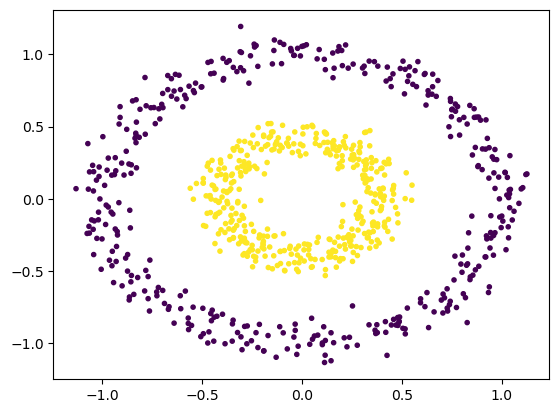

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=800, noise=0.07,random_state=1, factor=0.4)
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()


<img src ="https://scontent-lhr8-2.xx.fbcdn.net/v/t1.6435-9/89850897_933189737135527_553681057514258432_n.png?_nc_cat=106&ccb=1-7&_nc_sid=5f2048&_nc_ohc=ClkAsJaHTf8Q7kNvgHmGxCp&_nc_ht=scontent-lhr8-2.xx&oh=00_AfAUtsU_ObqTPY_YFW9DfZccfYa0ErIuJ0NjDT2Gp_bj6Q&oe=665F2FF5"/>



# Kernelization in SVM

An advantage of SVMs is that they can be easily kernelized to solve nonlinear classification problems.

If classes are not linearly separable in the original feature space, kernelization can transform the data into a higher-dimensional space where they may become separable:

$$ k(x_i, x_j) = \phi(X_i) \cdot \phi(X_j) $$

Here, $ k(x_i, x_j) $ is the kernel function, and $ \phi $ represents the transformation to higher-dimensional space. The kernel function acts as a similarity measure, with the hope that classes will become linearly separable in this new space.



Common kernel functions include:
- Linear: $$ K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i \cdot \mathbf{x}_j $$
- Polynomial: $$ K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma \mathbf{x}_i \cdot \mathbf{x}_j + r)^d $$
- Radial Basis Function (RBF): $$ K(\mathbf{x}_i, \mathbf{x}_j) = \exp(-\gamma ||\mathbf{x}_i - \mathbf{x}_j||^2) $$

Where $ \gamma ,  r ,  d $ are parameters that define the behavior of the kernel.




# Mapping Function

The function $ \phi $ maps a two-dimensional feature vector into a three-dimensional feature vector space:

$$
\phi(x_i) = \left[ \frac{1}{x_i}, \sqrt{\frac{1 + {x_i}^2}{x_i}}, \frac{2 - {x_i}^2}{2x_i} \right]
$$

This transformation is useful in machine learning for making complex data more interpretable by algorithms.


Linear Kernel Accuracy: 0.58875
RBF Kernel Accuracy: 1.0


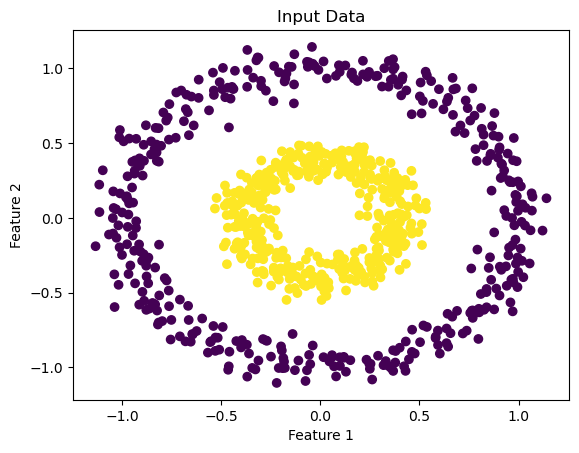

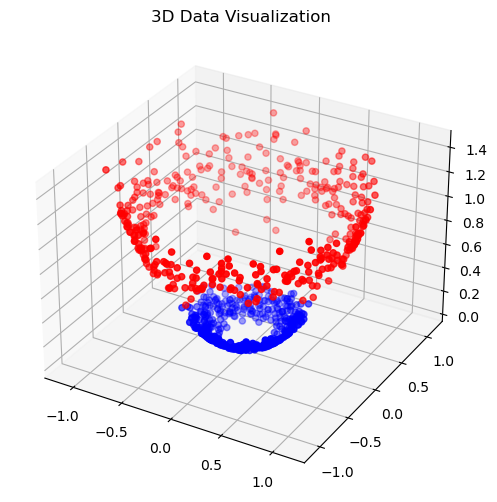

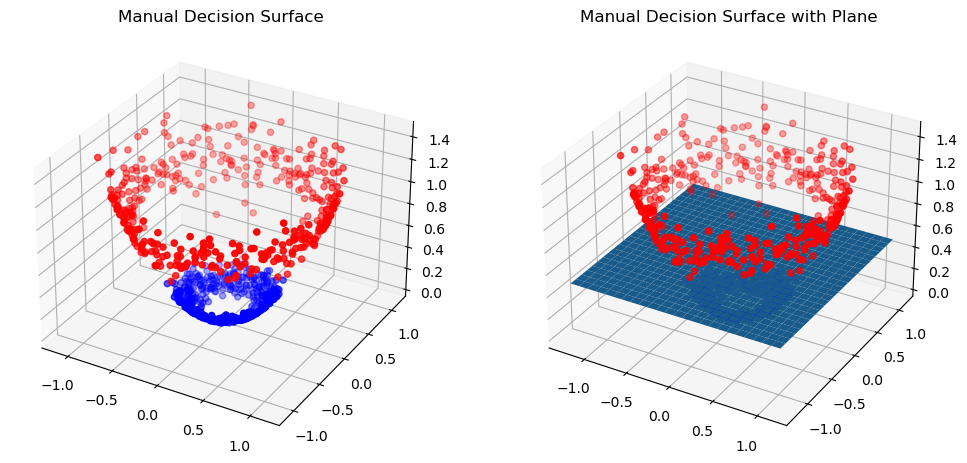

In [7]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create data
x, y = make_circles(n_samples=800, noise=0.07, factor=0.4)

# Project data
x_projected = x[:, 0]
y_projected = x[:, 1]
z_projected = x_projected ** 2 + y_projected ** 2


# Train SVM model
clf = SVC(kernel='linear')
clf.fit(np.c_[x_projected, y_projected], y)
output = clf.predict(np.c_[x_projected, y_projected])
print("Linear Kernel Accuracy:", accuracy_score(y, output))

clf = SVC(kernel='rbf')
clf.fit(np.c_[x_projected, y_projected], y)
output = clf.predict(np.c_[x_projected, y_projected])
print("RBF Kernel Accuracy:", accuracy_score(y, output))


# Plot input data
plt.scatter(x[:, 0], x[:, 1], c=y+1)
plt.title('Input Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Plot 3D visualization
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_projected[y==0], y_projected[y==0], z_projected[y==0], c='r')
ax.scatter(x_projected[y==1], y_projected[y==1], z_projected[y==1], c='b')
ax.set_title('3D Data Visualization')
plt.show()

# Plot manual decision surface
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_projected[y==0], y_projected[y==0], z_projected[y==0], c='r')
ax.scatter(x_projected[y==1], y_projected[y==1], z_projected[y==1], c='b')
ax.set_title('Manual Decision Surface')

ax1 = fig.add_subplot(122, projection='3d')
ax1.scatter(x_projected[y==0], y_projected[y==0], z_projected[y==0], c='r')
ax1.scatter(x_projected[y==1], y_projected[y==1], z_projected[y==1], c='b')
plane_x = np.arange(-1.25, 1.25, 0.1)
plane_y = np.arange(-1.25, 1.25, 0.1)
X, Y = np.meshgrid(plane_x, plane_y)
Z = np.zeros(X.shape)
Z[:, :] = 0.5
ax1.plot_surface(X, Y, Z)
ax1.set_title('Manual Decision Surface with Plane')

plt.show()



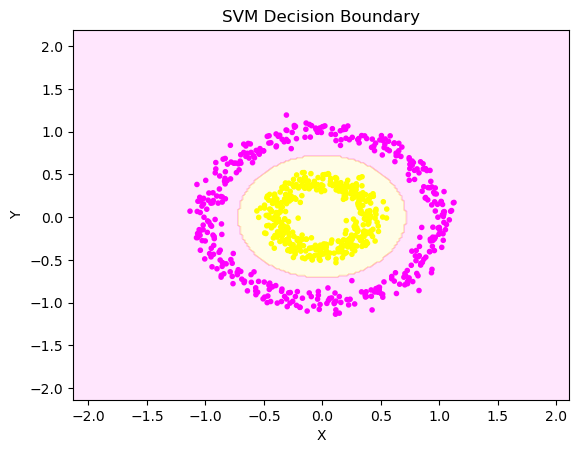

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

# Generate non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=800, noise=0.07, random_state=1, factor=0.4)

# Fit SVM model with RBF kernel
model = svm.SVC(kernel='rbf', C=1, gamma='auto')
model.fit(circle_X, circle_y)

# Function to plot decision boundary
def plot_decision_boundary(X, y, model):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.spring, alpha=0.1)

    # Plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.spring, marker='.')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('SVM Decision Boundary')

# Plot decision boundary
plot_decision_boundary(circle_X, circle_y, model)
plt.show()



# Implementation of Support Vector Machines (SVM)







## Steps for Implementation
The general steps for implementing an SVM model using scikit-learn are as follows:
1. **Data Preprocessing**: Prepare your data for training. This may include splitting the data into training and test sets, scaling the features, and encoding categorical variables if necessary.
2. **Model Training**: Create an SVM model using scikit-learn, fit it to your training data, and then use the model to make predictions.
3. **Model Prediction**: Use the trained model to predict the labels of new data points.
4. **Performance Evaluation**: Evaluate the performance of your model using appropriate metrics like accuracy, precision, recall, and F1-score.


## Libraries and Tools
We will use the `scikit-learn` library, which provides a simple and efficient tool for data mining and data analysis. Specifically, we'll use the `svm` module to create our SVM classifier.


<img src ="https://miro.medium.com/v2/resize:fit:720/format:webp/1*Pp5ZQowsSjqKmvtjlqWEug.jpeg"/>


## Code Snippets
Here's an example code snippet for creating and training an SVM model:

```python

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Sample dataset
X, y = # insert the dataset here 

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
clf = svm.SVC(C=1.0, kernel='rbf', gamma='scale')

# Train the classifier
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))


**Parameters Explanation**:
- **C**: Regularization parameter. The strength of the regularization is inversely proportional to C. It helps prevent the model from overfitting.

- **Kernel**: Specifies the kernel type to be used in the algorithm. It can be ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, etc. The ‘rbf’ kernel is commonly used.

- **Gamma**: Kernel coefficient for ‘rbf’, ‘poly’, and ‘sigmoid’. If ‘gamma’ is ‘auto’, then 1/n_features will be used, if ‘scale’, then 1/(n_features * X.var()) will be used as the value of gamma.



In sklearn.svm we can import these following SVM algorithms :

<ls>
    
    1.svm.LinearSVC: This is for linear Support Vector Classification. It's used for classifying data points into two or more classes using a linear decision boundary.
    
    2.svm.LinearSVR: This stands for Linear Support Vector Regression. It's used for regression tasks where the goal is to predict a continuous value rather than a class label. LinearSVR fits a linear model to the training data.
    
    3.svm.NuSVC: Nu-Support Vector Classification. Similar to LinearSVC, but allows control over the number of support vectors and margin errors using the parameter 'nu'.
    
    4.svm.NuSVR: Nu Support Vector Regression. Similar to LinearSVR, but with the parameter 'nu' controlling the number of support vectors and margin errors.
    
    5.svm.OneClassSVM: This is for unsupervised outlier detection. It learns a decision function for novelty detection: classifying new data as similar or different to the training set.
    
    6.svm.SVC: C-Support Vector Classification. This is the standard Support Vector Machine classifier. It's used for classification tasks and allows for non-linear decision boundaries through different kernel functions.
    
    7.svm.SVR: Epsilon-Support Vector Regression. Similar to SVR, but with the addition of an epsilon parameter, which specifies the epsilon-tube within which no penalty is associated in the training loss function.
    
    8.svm.l1_min_c: This is not a classifier or regressor, but rather a utility function to compute the lowest bound for the regularization parameter 'C' in an L1 penalized SVM.
    
</ls>

# Advantages and Disadvantages of Support Vector Machines (SVM)

## Advantages (Pros)
- **Effectiveness in High-Dimensional Spaces**: SVMs are particularly powerful in cases where the number of dimensions is greater than the number of samples, which makes them suitable for data with a large number of features.
- **Versatility**: The ability to use different kernel functions allows SVMs to be adaptable. They can model complex, non-linear relationships by choosing the appropriate kernel.

- **Higher Accuracy**: SVMs can achieve higher accuracy especially with the smaller datasets.

- **Robustness**: SVMs are robust against noise and outliers. Also is less prone to overfitting as its ability to maximize the margin and ignore outliers in high-dimensional spaces.

- **Efficient**: SVMs are known to be memory efficient i.e it uses only a subset of training points (support vectors) to make a decision boundary.



## Disadvantages (Cons)
- **Computational Intensity**: SVMs can be computationally intensive, which can lead to longer training times for large datasets.

- **Model Interpretability**: SVM models can be difficult to interpret compared to simpler models, which can make it challenging to explain the decision-making process of the model.

- **Sensitiity**: Very sensitive to noise present in the dataset, outliers can significantly affect the position of the hyperplane and the margin. Performance heavily relies on choosing of the right kernel function and hyerparameters (regularization parameter {c}), which may reqiure careful tuning to achieve optimal performance.

- **Binary Classification**: SVM inherently supports binary classification , although multi-class classification can be achieved with techniques like one-vs-rest or one-vs-one classifications.



## Comparison with Other Algorithms
- **Logistic Regression**: Unlike SVMs, logistic regression is a probabilistic model that estimates probabilities. Logistic regression is easier to implement and interpret but may not perform as well with non-linear boundaries unless feature engineering is applied.
- **Neural Networks**: Neural networks are capable of modeling even more complex relationships than SVMs due to their deep architectures. However, they require large amounts of data and computational resources, and like SVMs, they can be difficult to interpret.


<img src ="https://pbs.twimg.com/media/DboAmr5XUAAjCoX?format=jpg&name=small"/>

# Examples

## Classification

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
# 加载数据集
wine = datasets.load_wine()
X = wine.data
y = wine.target

# Divide training set and test set
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature normalization
# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVM classifier
# 创建SVM分类器
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)

# Train model
# 训练模型
svm_classifier.fit(X_train, y_train)

# Predict test set
# 预测测试集
y_pred = svm_classifier.predict(X_test)

# Performance evaluation
# 性能评估
print("Classification report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.95      0.98        21
           2       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Accuracy: 0.9814814814814815


**Confusion Matrix**:

A confusion matrix is   a table that shows the predictions of a classification model compared to the actual situation. It helps us see which predictions are correct and which are incorrect. Rows represent actual categories.
Columns represent predicted categories.
The value in each box represents the number of occurrences of the combination of predicted and actual categories.

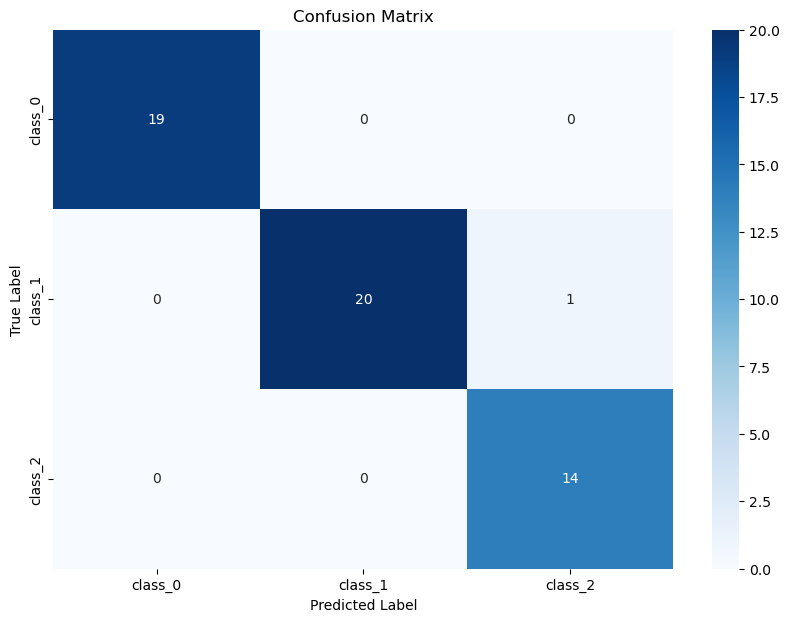

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



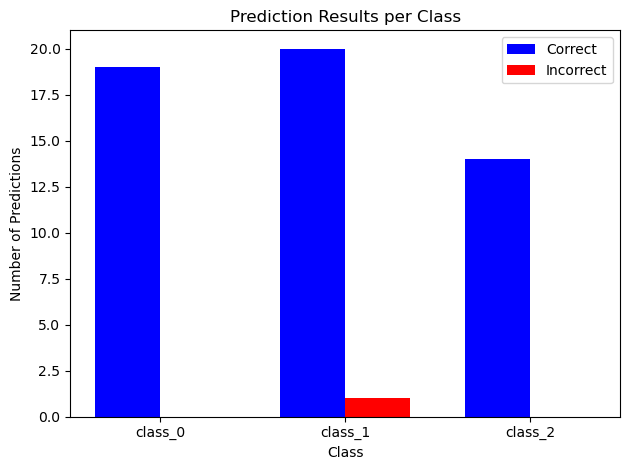

In [11]:
# Count correct and incorrect predictions per class
correct = [0] * len(wine.target_names)
incorrect = [0] * len(wine.target_names)
for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
        correct[y_test[i]] += 1
    else:
        incorrect[y_test[i]] += 1

# Bar plot for correct and incorrect predictions
fig, ax = plt.subplots()
bar_width = 0.35
index = np.arange(len(wine.target_names))

bar1 = plt.bar(index, correct, bar_width, label='Correct', color='b')
bar2 = plt.bar(index + bar_width, incorrect, bar_width, label='Incorrect', color='r')

plt.xlabel('Class')
plt.ylabel('Number of Predictions')
plt.title('Prediction Results per Class')
plt.xticks(index + bar_width / 2, wine.target_names)
plt.legend()

plt.tight_layout()
plt.show()


#### 1. Results Interpretation

The classification results from the SVM model on the wine dataset indicate a high level of prediction accuracy. The model achieves an overall accuracy of 98.15%, which is exceptional for practical applications. This suggests that the model is well-fitted to the data and capable of distinguishing between the different classes of wine effectively.

**Class 0:** Achieved perfect precision and recall, indicating that all predictions for this class were correct and all actual class 0 samples were identified.

**Class 1:** Also displayed high precision, meaning no samples were incorrectly labeled as class 1. However, the recall is slightly lower, which means a few class 1 samples were missed.

**Class 2:** Showed slightly lower precision than the other classes but compensated with a perfect recall rate, indicating every actual class 2 sample was identified, although some other samples were mistakenly labeled as class 2.


#### 2. Performance Evaluation Metrics

**Precision:** Measures the accuracy of positive predictions. Formulated as the ratio of true positives to the sum of true and false positives. It is crucial for situations where the cost of a false positive is high.

**Recall (Sensitivity):** Measures the ability of a model to find all the relevant cases (true positives). It is the ratio of true positives to the sum of true positives and false negatives. This metric is particularly important where missing a positive instance is costly.

**F1-Score:** Combines precision and recall into a single metric by taking their harmonic mean. It is useful when you need to balance precision and recall and when there are uneven class distributions.

**Accuracy:** Gives a simple ratio of correctly predicted observation to the total observations. It is suitable for datasets where the class distribution is similar.


These metrics reflect not only the model’s ability to predict the correct class labels but also its robustness in handling imbalances or particularities in the dataset. The high values in precision, recall, and F1-score across all classes signify a strong classifier that performs well under varied conditions.


## Regression

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Load the California housing price data set
# 加载加利福尼亚房价数据集
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Divide training set and test set
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature normalization
# 特征标准化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create SVR regressor
# 创建SVR回归器
svr_regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Train model
# 训练模型
svr_regressor.fit(X_train, y_train)

# Predict test set
# 预测测试集
y_pred = svr_regressor.predict(X_test)

# Performance evaluation
# 性能评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Square Error(MSE):", mse)
print("R^2 score:", r2)


Mean Square Error(MSE): 0.3125313826189061
R^2 score: 0.7618881276401898


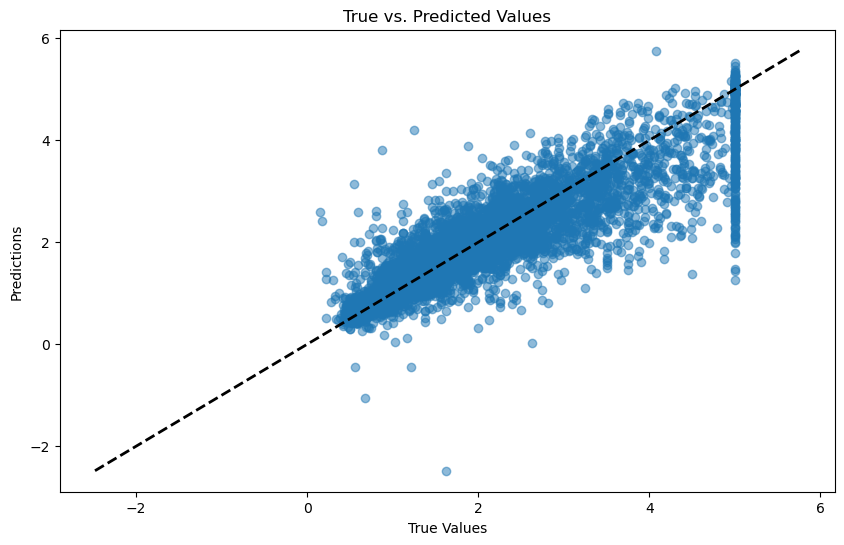

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())], [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs. Predicted Values')
plt.show()


**Interpretation of results**

- **Mean Squared Error (MSE) 0.3125:** This value tells us that the model’s average squared error in predicting California home prices is 0.3125. This number reflects the size of the difference between the predicted value and the actual value. Generally speaking, the smaller the MSE, the better the prediction ability of the model. In practical applications, MSE needs to be considered together with the range and context of the data, because its absolute value is affected by the dimensions of the data itself.
     
- **R^2 score 0.7619:** This score indicates that this model explains 76.19% of the variance in the data. The closer the R^2 score is to 1, the stronger the prediction ability of the model and the better it can fit the data. In this case, 0.7619 is a relatively high value, indicating that the model has good predictive power on the data, but there is still room for improvement, especially considering how to further improve the proportion of variance explained.

**Performance evaluation metrics**

In this SVR model scenario, we mainly used MSE and R^2 to evaluate model performance. Each of these two indicators provides different aspects of information:

- **Mean Squared Error (MSE):** As mentioned earlier, this metric measures the average of the squared differences between the predicted and actual values, which directly reflects the error in the predicted value.

* **R^2 score:** This score measures how well the model fits the data. The higher the R^2 score, the better the model's performance is generally considered. 

Through these evaluation metrics, we can conclude that this model performs well, but there is still room for further optimization. Consider adjusting model parameters such as C, gamma, and epsilon in SVR, or try different feature engineering techniques to further improve the model's predictive power and accuracy.

# Tips and Tricks

Support vector machine (SVM) is a very powerful supervised learning algorithm, mainly used for classification problems, but can also be used for regression problems. Its core idea is to find a hyperplane in the feature space to maximize the margin between positive and negative classes. In order to use SVM effectively and maximize its performance, we can follow some best practices while taking care to avoid some common pitfalls and apply some optimization techniques.



**1. Best practices for effective use of algorithms**
*    **Feature scaling:** SVM is very sensitive to the scale of features, so feature normalization (such as scaling using the mean and standard deviation) or normalization (scaling the features into the range [0, 1]) is crucial to help improve the convergence speed and effectiveness of the model.
*    **Appropriate kernel selection:** Choosing the right kernel function is the key to the successful application of SVM. Common kernel functions include linear kernel, polynomial kernel, radial basis function (RBF) kernel, and Sigmoid kernel. The kernel function is selected based on the distribution of the data and the nature of the problem. For example, nonlinear problems may benefit from an RBF kernel, while linearly separable data is suitable for a linear kernel.
*    **Parameter adjustment:** The parameters of the kernel function (such as γ of the RBF kernel) and the regularization parameter C have a significant effect on the model performance. Systematically searching for optimal parameter combinations using methods such as Grid Search combined with Cross-validation is highly recommended.


**2. Common pitfalls to avoid**
*   **Overfitting:** SVM models are prone to overfitting, especially when using a kernel with high degrees of freedom, such as a highly polynomial kernel. It is important to choose the regularization parameter C (which controls the penalty strength of the error) appropriately to avoid overfitting. A large C value reduces the training error but may increase the generalization error.
*   **Choosing over-complex kernels:** Over-complex kernels can result in a model that performs well on training data but poorly on new data. Always start with simple cores and gradually test more complex cores to see if they are really needed.
Neglecting data understanding and *
*   **preprocessing:** SVM is not a one-size-fits-all tool, and understanding the data and proper preprocessing (such as removing noise and outliers) are critical to final model performance.


**3. Optimize technology**
*   **Feature selection:** Feature selection before SVM is applied can reduce the complexity of the model, improve the training speed, and possibly improve the generalization ability of the model. Feature selection can be based on model weights, based on statistical testing, or using techniques such as recursive feature elimination (RFE).
*   **Incremental or online learning:** For large data sets, SVM variants that use incremental or online learning, such as online SVM, can effectively manage memory usage, allowing the model to be updated gradually.
*   **Parallel processing and hardware acceleration:** Parallel training of SVMS using modern hardware platforms such as Gpus can significantly improve training speed on large data sets.

# Conclusion

**Support vector machine (SVM) is a powerful supervised learning algorithm mainly used for classification and regression problems. Here is a summary of the key points of SVM:**

*    **Basic principle:** The core idea of SVM is to find an optimal hyperplane, so that different categories of data are separated as far as possible on both sides of the hyperplane, so as to achieve the purpose of classification. In two-dimensional space, this hyperplane can be seen as a straight line, while in higher dimensional space, it is a hyperplane.
*    **Maximum interval:** SVM tries to improve the generalization ability of the model by maximizing the interval between classes. This idea of maximum spacing is an important feature of SVM that distinguishes it from other classification algorithms.
*    **Support vectors:** Support vectors are the data points closest to the separated hyperplane and are key elements in building the hyperplane. Only support vectors affect the position and orientation of the hyperplane.


*    **Kernel trick:** SVM can map the input space into a high-dimensional space by kernel trick, so that data that is linearly indivisible in the original space can be linearly separated in the new space. Common kernel functions include linear kernel, polynomial kernel, radial basis function (RBF) kernel and so on.
*    **Parameter tuning:** SVM performance depends heavily on the choice of parameters, such as the regularization parameter C (which controls the penalty strength of misclassification) and the parameters of the kernel function (such as the γ parameter of the RBF kernel). Proper parameter adjustment is essential for optimal performance.
*    **Scope of application:** SVM is widely used in many fields, including image recognition, bioinformatics, text classification, etc., due to its efficiency and accuracy.
*    **Challenges:** While SVM performs well on many problems, it is inefficient with large data sets and is very sensitive to the choice of parameters and kernel functions. In addition, the results of the SVM model are not easy to interpret, which can be a disadvantage in applications where model interpretability is required.

Overall, SVM is a very powerful machine learning tool, suitable for dealing with a variety of complex classification problems, but also requires careful parameter tuning and reasonable kernel selection to achieve the best performance.

**As a powerful machine learning algorithm, support vector machine (SVM) has several directions and areas that can be improved in the future development:**

*    **Scaling to large-scale data processing:** SVMs face efficiency and computational cost challenges when processing large-scale data sets, especially in the context of the big data era. Future research could explore more efficient algorithm implementations, including but not limited to distributed computing methods, algorithm optimization with reduced support vectors, and approximation learning techniques to increase processing speed.
*    **Enhanced model interpretability:** SVM's decision-making process is often viewed as a "black box," which can be a disadvantage in application scenarios that require a high degree of transparency and explainability (e.g. medical diagnosis, financial risk assessment). Future research could focus on developing new tools and methods to explain the decision process of the SVM model, making it more widely used in these fields.
*    **Applications of multitasking and transfer learning:** Current SVMs are optimized for single tasks. Combining SVM with multi-task learning and transfer learning can improve its ability to transfer knowledge between different but related tasks, thus improving the universality and efficiency of the model.
*    **Hybrid model and ensemble Learning:** Combining SVM with other machine learning algorithms, such as deep learning models, to form a hybrid model or ensemble learning system may provide better performance for certain tasks than SVM alone. This method can take advantage of the advantages of various models to improve the overall prediction accuracy and robustness.
*    **Algorithm improvements and development of new kernel functions:** While existing kernel functions are already powerful, developing new kernel functions for specific types of data and problems may further improve SVM performance. In addition, the improvement of the algorithm itself is also an important research direction, including optimizing the convergence rate and stability of the algorithm.

In summary, although SVM is a mature machine learning algorithm, it still has great development potential and practical value through technological innovation and cross-field application expansion. Continued research and experimentation will be key to moving this field forward.

# Thank You For Listening. Any Questions?

# References 

1. https://www.youtube.com/watch?v=_PwhiWxHK8o&t=2099s (Mathematical Concept)

2. https://www.youtube.com/watch?v=_YPScrckx28 (Concept)

3. https://www.youtube.com/watch?v=Q7vT0--5VII (Concept)

4. https://codingmachinelearning.wordpress.com/2016/08/19/svm-plotting-the-hyperplane/ (3D - visualization code, it was simplified by removing the defination functions)

5. Google Images for the memes

6. https://medium.com/cube-dev/support-vector-machines-tutorial-c1618e635e93 (Concept)

7. https://scikit-learn.org/stable/modules/svm.html (Implementation)

8. SVM lecture slides by Conor Rankine (Lecture - 3) - Data Analysis and Machine Learning Module

9. https://web.mit.edu/6.034/wwwbob/svm.pdf (Concepts)

10. https://www.bilibili.com/video/BV16T4y1y7qj/?spm_id_from=333.337.search-card.all.click&vd_source=a91cd49e7cc0091451d42287fd76a4fe

## CONTRIBUTIONS

- **INTRODUCTION, THEORY, IMPLEMENTATION AND ADVANTAGES AND DISADVANTAGES** - KRUSHNA 

- **EXAMPLE, TIPS AND TRICKS AND CONCLUSION** - QILIN